# BASICS 02 - Training the core network (unsupervised)

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
%cd '../HOTS'

import tonic
from network import network
from tools import get_loader
import numpy as np
import matplotlib.pyplot as plt

/home/INT/grimaldi.a/Documents/projets/HOTS/newhots/HOTS


## Loading events

In [2]:
train = True
dataset = tonic.datasets.POKERDVS(save_to='../../Data', train=train, transform = tonic.transforms.NumpyAsType(int))
loader = get_loader(dataset, kfold=10)
print(f'Size of Dataloader: {len(loader)} samples')

Size of Dataloader: 4 samples


## Network definition and training and store learning of the weights

In [3]:
timestr = '2021-11-25_poker'
name = 'homhots'
tau = (0.7,1.4,2.8)
homeo = (2,1)
learn = True
to_record = True

loading a network with name:
 ../Records/models/2021-11-25_poker_homhots_(2, 1)_[4, 8, 16]_[0.7, 1.4, 2.8]_[2, 4, 8].pkl


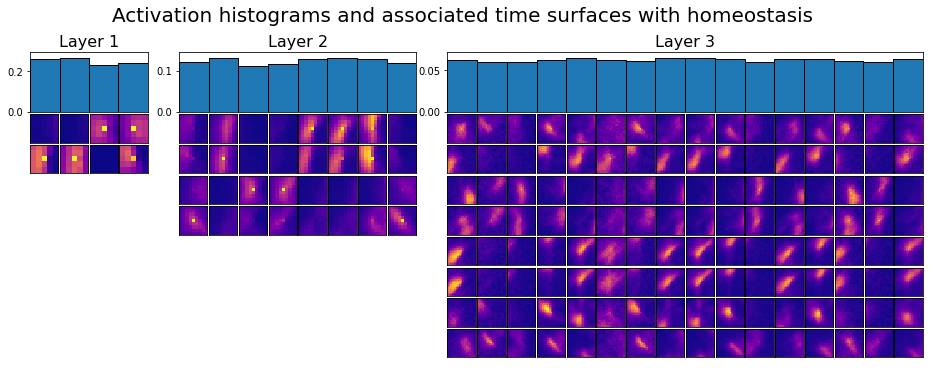

In [4]:
hots = network(name=name, tau=tau, homeo=homeo, timestr=timestr, to_record=to_record)
hots.running(loader, dataset.ordering, dataset.classes, learn=learn, train=train)
hots.plotlayer();

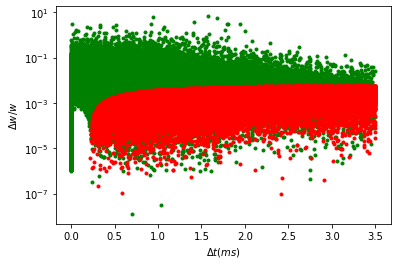

In [5]:
layer = 0

dw_pos = hots.stats[layer].delta_wt[hots.stats[layer].delta_wt[:,0] > 0, 0]/hots.stats[layer].delta_wt[hots.stats[layer].delta_wt[:,0] > 0, 3]
dw_neg = hots.stats[layer].delta_wt[hots.stats[layer].delta_wt[:,0] < 0, 0]/hots.stats[layer].delta_wt[hots.stats[layer].delta_wt[:,0] < 0, 3]
dt_pos = hots.stats[layer].delta_wt[hots.stats[layer].delta_wt[:,0] > 0, 1]
dt_neg = hots.stats[layer].delta_wt[hots.stats[layer].delta_wt[:,0] < 0, 1]

plt.semilogy(dt_pos[dw_pos<10]*1e-3, dw_pos[dw_pos<10],'. g');
plt.plot(dt_neg*1e-3, -dw_neg,'. r');
plt.xlabel('$\Delta t (ms)$');
plt.ylabel('$\Delta w/w$');

/tmp/ipykernel_158194/3738755297.py:2: RuntimeWarning: invalid value encountered in true_divide
  dw = hots.stats[layer].delta_wt[:, 0]/hots.stats[layer].delta_wt[:, 3]


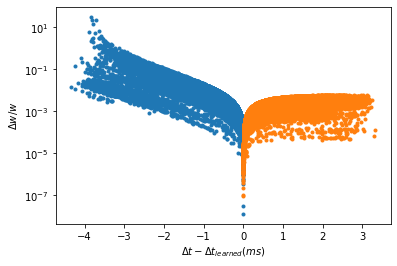

In [6]:
dt_XTS = hots.stats[layer].delta_wt[:, 1]-hots.stats[layer].delta_wt[:, 2]
dw = hots.stats[layer].delta_wt[:, 0]/hots.stats[layer].delta_wt[:, 3]
plt.semilogy(dt_XTS*1e-3,dw, '.');
plt.semilogy(dt_XTS*1e-3,-dw, '.');
plt.xlabel('$\Delta t - \Delta t_{learned} (ms)$');
plt.ylabel('$\Delta w / w$');

/tmp/ipykernel_158194/915659017.py:1: RuntimeWarning: divide by zero encountered in log
  dt_XTS = np.log(hots.stats[layer].delta_wt[1:, 1]/hots.stats[layer].delta_wt[1:, 2])


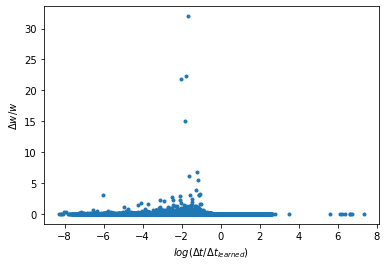

In [7]:
dt_XTS = np.log(hots.stats[layer].delta_wt[1:, 1]/hots.stats[layer].delta_wt[1:, 2])
dw = hots.stats[layer].delta_wt[1:, 0]/hots.stats[layer].delta_wt[1:, 3]
plt.plot(dt_XTS,dw, '.');
#plt.semilogy(dt_XTS,-dw, '.')
plt.xlabel('$log(\Delta t / \Delta t_{learned})$');
plt.ylabel('$\Delta w / w$');

### Without homeostasis

In [8]:
name = 'hots'
homeo=None

loading a network with name:
 ../Records/models/2021-11-25_poker_hots_None_[4, 8, 16]_[0.7, 1.4, 2.8]_[2, 4, 8].pkl


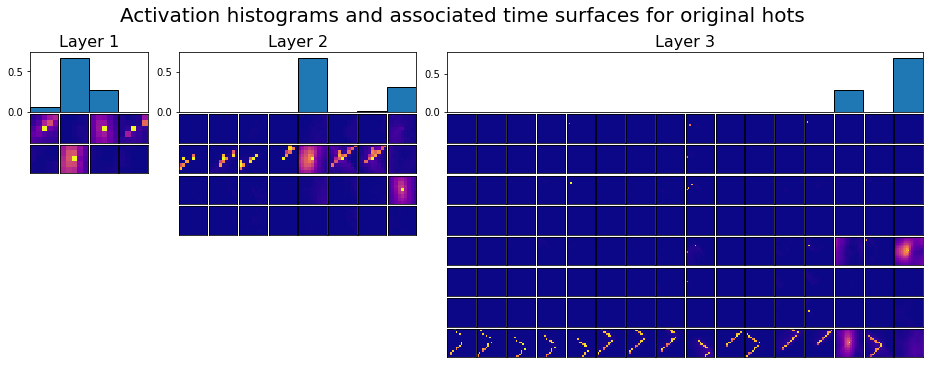

In [9]:
hots = network(name = name, tau = tau, timestr = timestr, to_record=to_record)
hots.running(loader, dataset.ordering, dataset.classes, learn=learn, train=train)
hots.plotlayer();

/tmp/ipykernel_158194/3738755297.py:1: RuntimeWarning: invalid value encountered in subtract
  dt_XTS = hots.stats[layer].delta_wt[:, 1]-hots.stats[layer].delta_wt[:, 2]
/tmp/ipykernel_158194/3738755297.py:2: RuntimeWarning: divide by zero encountered in true_divide
  dw = hots.stats[layer].delta_wt[:, 0]/hots.stats[layer].delta_wt[:, 3]
/tmp/ipykernel_158194/3738755297.py:2: RuntimeWarning: invalid value encountered in true_divide
  dw = hots.stats[layer].delta_wt[:, 0]/hots.stats[layer].delta_wt[:, 3]


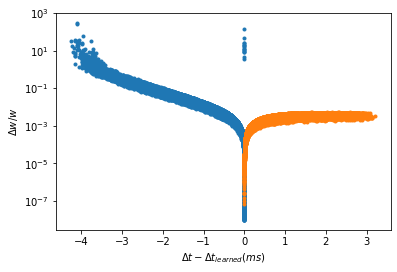

In [10]:
dt_XTS = hots.stats[layer].delta_wt[:, 1]-hots.stats[layer].delta_wt[:, 2]
dw = hots.stats[layer].delta_wt[:, 0]/hots.stats[layer].delta_wt[:, 3]
plt.semilogy(dt_XTS*1e-3,dw, '.');
plt.semilogy(dt_XTS*1e-3,-dw, '.');
plt.xlabel('$\Delta t - \Delta t_{learned} (ms)$');
plt.ylabel('$\Delta w / w$');

## Running network
### Training set

In [11]:
loader = get_loader(dataset)
print(f'Size of Dataloader: {len(loader)} samples')
train = True 
jitonic = None
name = 'homhots'
homeo = (2,1)
timestr = '2021-12-17_poker'

Size of Dataloader: 48 samples


loading a network with name:
 ../Records/models/2021-12-17_poker_homhots_(2, 1)_[4, 8, 16]_[0.7, 1.4, 2.8]_[2, 4, 8].pkl


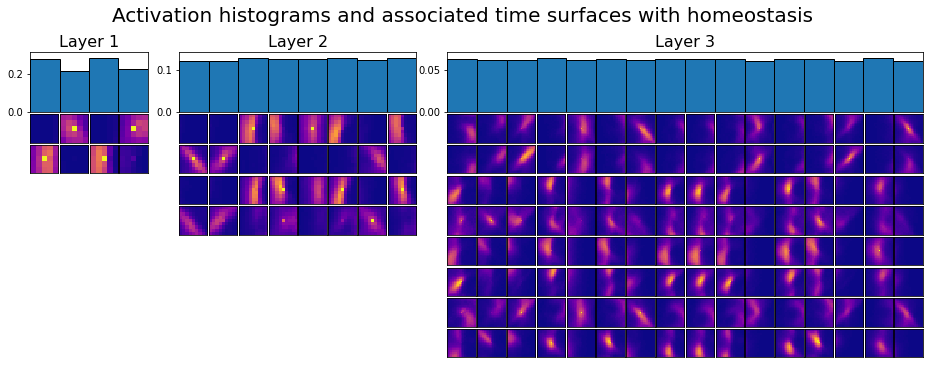

this dataset have already been processed, check at: 
 ../Records/output/train/2021-12-17_poker_homhots_(2, 1)_[4, 8, 16]_[0.7, 1.4, 2.8]_[2, 4, 8]_None/


In [12]:
hots = network(name = name, tau = tau, homeo = homeo, timestr = timestr)
hots.running(loader, dataset.ordering, dataset.classes, train=train, learn=True)
hots.plotlayer();
hots.running(loader, dataset.ordering, dataset.classes, train=train) # not mentioning learn=True means the network is running without learning

### Testing set

In [13]:
train=False
dataset_test = tonic.datasets.POKERDVS(save_to='../../Data', train=train, transform = tonic.transforms.NumpyAsType(int))
loader = get_loader(dataset_test)
print(f'Size of Dataloader: {len(loader)} samples')

Size of Dataloader: 20 samples


In [14]:
hots.running(loader, dataset.ordering, dataset.classes, train=train)

this dataset have already been processed, check at: 
 ../Records/output/test/2021-12-17_poker_homhots_(2, 1)_[4, 8, 16]_[0.7, 1.4, 2.8]_[2, 4, 8]_None/
